In [1]:
import pandas as pd
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

%matplotlib inline

In [2]:
data = yf.download("SI=F" 
                   , start="2018-01-01", end="2022-10-26")

[*********************100%***********************]  1 of 1 completed


In [3]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume'])
data_df.tail()

,Close
Date,
2022-10-19,18.336000
2022-10-20,18.666000
2022-10-21,19.042999
2022-10-24,19.174000
2022-10-25,19.339001


In [4]:
data_df.isna().sum()

Close    0
dtype: int64

In [5]:
daily_change = data_df.pct_change()
daily_change.tail()

,Close
Date,
2022-10-19,-0.012654
2022-10-20,0.017997
2022-10-21,0.020197
2022-10-24,0.006879
2022-10-25,0.008605


<AxesSubplot:xlabel='Date'>

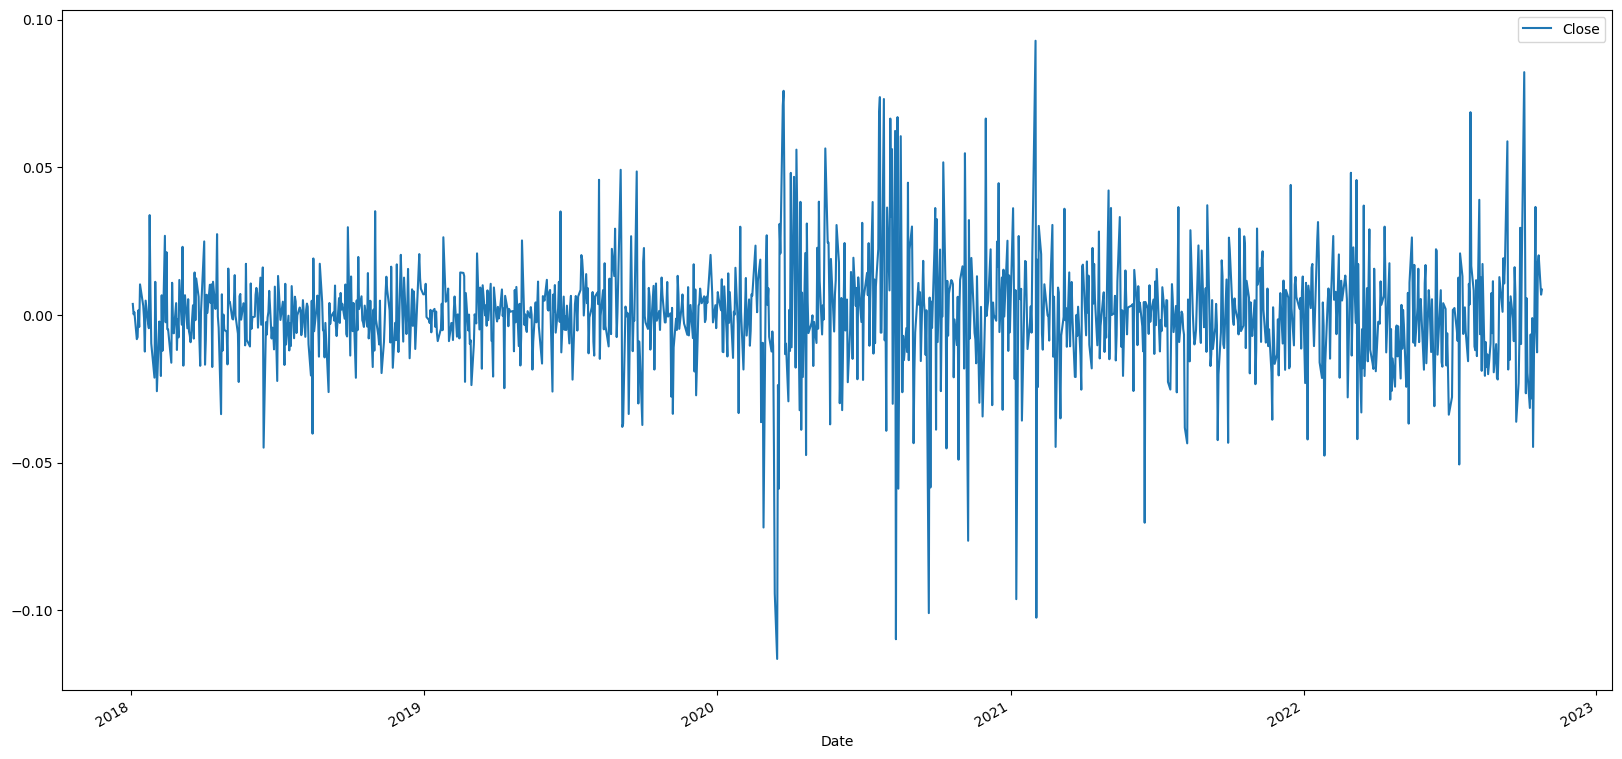

In [6]:
daily_change.plot(figsize=(20,10))

In [7]:
daily_change.describe()

,Close
count,1211.000000
mean,0.000291
std,0.019459
min,-0.116491
25%,-0.008637
50%,0.000487
75%,0.008959
max,0.092862


In [8]:
average = daily_change.mean()
average = average.sort_values()
average

Close    0.000291
dtype: float64

In [9]:
std = daily_change.std()
std = std.sort_values()
std

Close    0.019459
dtype: float64

In [10]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_change).cumprod()
cumulative_returns.head()

,Close
Date,
2018-01-02,NaN
2018-01-03,1.003738
2018-01-04,1.003972
2018-01-05,1.004906
2018-01-08,0.996671


<AxesSubplot:xlabel='Date'>

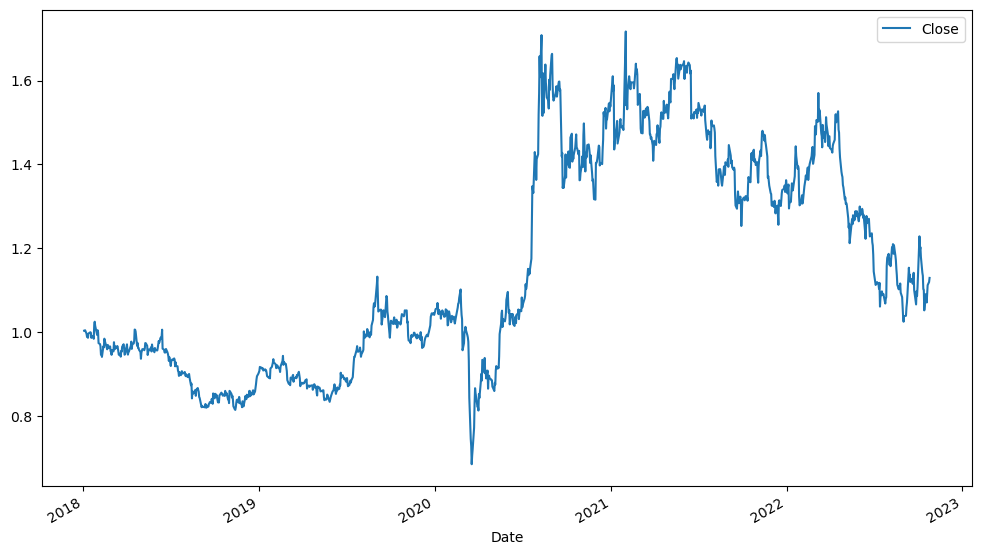

In [11]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))